# Proyecto DS - Parte 1 - EDA 
Ciencia de datos 1 - Data de alimentos

# Densidad Nutricional

Problema a resolver: Analizar la densidad nutricional de los alimentos

Contexto Analitico:


 Columnas disponibles
1.  **Food**: The name or type of the food item.
2.  **Caloric Value**: Total energy provided by the food, typically measured in kilocalories (kcal) per 100 grams.
3.  **Fat( in g)**: Total amount of fats in grams per 100 grams, including the breakdowns that follow.
4.  **Saturated Fats( in g)**: Amount of saturated fats (fats that typically raise the level of cholesterol in the blood) in grams per 100 grams.
5.  **Monounsaturated Fats( in g)**: Amount of monounsaturated fats (considered heart-healthy fats) in grams per 100 grams.
6.  **Polyunsaturated Fats( in g)**: Amount of polyunsaturated fats (include essential fats your body needs but can't produce itself) in grams per 100 grams.
7.  **Carbohydrates( in g)**: Total carbohydrates in grams per 100 grams, including sugars.
8.  **Sugars( in g)**: Total sugars in grams per 100 grams, a subset of carbohydrates.
9.  **Protein( in g)**: Total proteins in grams per 100 grams, essential for body repair and growth.
10.  **Dietary Fiber( in g)**: Fiber content in grams per 100 grams, important for digestive health.
11.  **Cholesterol( in mg)**: Cholesterol content in milligrams per 100 grams, pertinent for cardiovascular health.
12.  **Sodium( in g)**: Sodium content in milligrams per 100 grams, crucial for fluid balance and nerve function.
13.  **Water( in g)**: Water content in grams per 100 grams, which affects the food�?Ts energy density.
14.  **Vitamin A( in mg)**: Amount of Vitamin A in micrograms per 100 grams, important for vision and immune functioning.
15.  **Vitamin B1 (Thiamine)( in mg)**: Essential for glucose metabolism.
16.  **Vitamin B11 (Folic Acid)( in mg)**: Crucial for cell function and tissue growth, particularly important in pregnancy.
17.  **Vitamin B12( in mg)**: Important for brain function and blood formation.
18.  **Vitamin B2 (Riboflavin)( in mg)**: Necessary for energy production, cell function, and fat metabolism.
19.  **Vitamin B3 (Niacin)( in mg)**: Supports digestive system, skin, and nerves health.
20.  **Vitamin B5 (Pantothenic Acid)( in mg)**: Necessary for making blood cells, and helps convert food into energy.
21.  **Vitamin B6( in mg)**: Important for normal brain development and keeping the nervous and immune systems healthy.
22.  **Vitamin C( in mg)**: Important for the repair of all body tissues.
23.  **Vitamin D( in mg)**: Crucial for the absorption of calcium, promoting bone growth and health.
24.  **Vitamin E( in mg)**: Acts as an antioxidant, helping to protect cells from the damage caused by free radicals.
25.  **Vitamin K( in mg)**: Necessary for blood clotting and bone health.
26.  **Calcium( in mg)**: Vital for building and maintaining strong bones and teeth.
27.  **Copper( in mg)**: Helps with the formation of collagen, increases the absorption of iron and plays a role in energy production.
28.  **Iron( in mg)**: Essential for the creation of red blood cells.
29.  **Magnesium( in mg)**: Important for many processes in the body including regulation of muscle and nerve function, blood sugar levels, and blood pressure and making protein, bone, and DNA.
30.  **Manganese( in mg)**: Involved in the formation of bones, blood clotting factors, and enzymes that play a role in fat and carbohydrate metabolism, calcium absorption, and blood sugar regulation.
31.  **Phosphorus( in mg)**: Helps with the formation of bones and teeth and is necessary for the body to make protein for the growth, maintenance, and repair of cells and tissues.
32.  **Potassium( in mg)**: Helps regulate fluid balance, muscle contractions, and nerve signals.
33.  **Selenium( in mg)**: Important for reproduction, thyroid gland function, DNA production, and protecting the body from damage caused by free radicals and from infection.
34.  **Zinc( in mg)**: Necessary for the immune system to properly function and plays a role in cell division, cell growth, wound healing, and the breakdown of carbohydrates.
35.  **Nutrition Density**: A metric indicating the nutrient richness of the food per calorie.  
    Each of these columns provides critical data that can help in understanding the nutritional content of various foods, supporting a wide range of dietary, health, and medical research applications.1.  **Food**: The name or type of the food item.
2.  **Caloric Value**: Total energy provided by the food, typically measured in kilocalories (kcal) per 100 grams.
3.  **Fat( in g)**: Total amount of fats in grams per 100 grams, including the breakdowns that follow.
4.  **Saturated Fats( in g)**: Amount of saturated fats (fats that typically raise the level of cholesterol in the blood) in grams per 100 grams.
5.  **Monounsaturated Fats( in g)**: Amount of monounsaturated fats (considered heart-healthy fats) in grams per 100 grams.
6.  **Polyunsaturated Fats( in g)**: Amount of polyunsaturated fats (include essential fats your body needs but can't produce itself) in grams per 100 grams.
7.  **Carbohydrates( in g)**: Total carbohydrates in grams per 100 grams, including sugars.
8.  **Sugars( in g)**: Total sugars in grams per 100 grams, a subset of carbohydrates.
9.  **Protein( in g)**: Total proteins in grams per 100 grams, essential for body repair and growth.
10.  **Dietary Fiber( in g)**: Fiber content in grams per 100 grams, important for digestive health.
11.  **Cholesterol( in mg)**: Cholesterol content in milligrams per 100 grams, pertinent for cardiovascular health.
12.  **Sodium( in g)**: Sodium content in milligrams per 100 grams, crucial for fluid balance and nerve function.
13.  **Water( in g)**: Water content in grams per 100 grams, which affects the food�?Ts energy density.
14.  **Vitamin A( in mg)**: Amount of Vitamin A in micrograms per 100 grams, important for vision and immune functioning.
15.  **Vitamin B1 (Thiamine)( in mg)**: Essential for glucose metabolism.
16.  **Vitamin B11 (Folic Acid)( in mg)**: Crucial for cell function and tissue growth, particularly important in pregnancy.
17.  **Vitamin B12( in mg)**: Important for brain function and blood formation.
18.  **Vitamin B2 (Riboflavin)( in mg)**: Necessary for energy production, cell function, and fat metabolism.
19.  **Vitamin B3 (Niacin)( in mg)**: Supports digestive system, skin, and nerves health.
20.  **Vitamin B5 (Pantothenic Acid)( in mg)**: Necessary for making blood cells, and helps convert food into energy.
21.  **Vitamin B6( in mg)**: Important for normal brain development and keeping the nervous and immune systems healthy.
22.  **Vitamin C( in mg)**: Important for the repair of all body tissues.
23.  **Vitamin D( in mg)**: Crucial for the absorption of calcium, promoting bone growth and health.
24.  **Vitamin E( in mg)**: Acts as an antioxidant, helping to protect cells from the damage caused by free radicals.
25.  **Vitamin K( in mg)**: Necessary for blood clotting and bone health.
26.  **Calcium( in mg)**: Vital for building and maintaining strong bones and teeth.
27.  **Copper( in mg)**: Helps with the formation of collagen, increases the absorption of iron and plays a role in energy production.
28.  **Iron( in mg)**: Essential for the creation of red blood cells.
29.  **Magnesium( in mg)**: Important for many processes in the body including regulation of muscle and nerve function, blood sugar levels, and blood pressure and making protein, bone, and DNA.
30.  **Manganese( in mg)**: Involved in the formation of bones, blood clotting factors, and enzymes that play a role in fat and carbohydrate metabolism, calcium absorption, and blood sugar regulation.
31.  **Phosphorus( in mg)**: Helps with the formation of bones and teeth and is necessary for the body to make protein for the growth, maintenance, and repair of cells and tissues.
32.  **Potassium( in mg)**: Helps regulate fluid balance, muscle contractions, and nerve signals.
33.  **Selenium( in mg)**: Important for reproduction, thyroid gland function, DNA production, and protecting the body from damage caused by free radicals and from infection.
34.  **Zinc( in mg)**: Necessary for the immune system to properly function and plays a role in cell division, cell growth, wound healing, and the breakdown of carbohydrates.
35.  **Nutrition Density**: A metric indicating the nutrient richness of the food per calorie.  
    Each of these columns provides critical data that can help in understanding the nutritional content of various foods, supporting a wide range of dietary, health, and medical research applications.

In [1]:
#Hago el import de las librerias a utilizar para la exploracion inicial de datos. 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from urllib.parse import quote
# Librerías para arboles de decision 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
# Levanto el primer CSV para hacer una exploracion de los datos
csv_url = 'https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET/FOOD-DATA-GROUP1.csv'

# Levanto el CSV en un dataframe de pandas
g1 = pd.read_csv(csv_url)

# muestro el head
print(g1.head())

   Unnamed: 0.1  Unnamed: 0                              food  Caloric Value  \
0             0           0                      cream cheese             51   
1             1           1                 neufchatel cheese            215   
2             2           2  requeijao cremoso light catupiry             49   
3             3           3                    ricotta cheese             30   
4             4           4              cream cheese low fat             30   

    Fat  Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  \
0   5.0             2.9                   1.3                 0.200   
1  19.4            10.9                   4.9                 0.800   
2   3.6             2.3                   0.9                 0.000   
3   2.0             1.3                   0.5                 0.002   
4   2.3             1.4                   0.6                 0.042   

   Carbohydrates  Sugars  ...  Calcium  Copper   Iron  Magnesium  Manganese  \
0            

In [3]:
# Listas las columnas disponibles
print('Las columnas disponibles en el dataset son:')
g1.columns

Las columnas disponibles en el dataset son:


Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

In [4]:
# Levanto el segundo CSV para hacer una exploracion de los datos
csv_url = 'https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET/FOOD-DATA-GROUP2.csv'

# Levanto el CSV en un dataframe de pandas
g2 = pd.read_csv(csv_url)

# muestro el head
g2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          319 non-null    int64  
 1   Unnamed: 0            319 non-null    int64  
 2   food                  319 non-null    object 
 3   Caloric Value         319 non-null    int64  
 4   Fat                   319 non-null    float64
 5   Saturated Fats        319 non-null    float64
 6   Monounsaturated Fats  319 non-null    float64
 7   Polyunsaturated Fats  319 non-null    float64
 8   Carbohydrates         319 non-null    float64
 9   Sugars                319 non-null    float64
 10  Protein               319 non-null    float64
 11  Dietary Fiber         319 non-null    float64
 12  Cholesterol           319 non-null    float64
 13  Sodium                319 non-null    float64
 14  Water                 319 non-null    float64
 15  Vitamin A             3

In [5]:
# Levanto el Tercero CSV para hacer una exploracion de los datos
csv_url = 'https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET/FOOD-DATA-GROUP3.csv'

# Levanto el CSV en un dataframe de pandas
g3 = pd.read_csv(csv_url)

# muestro el head
g3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          571 non-null    int64  
 1   Unnamed: 0            571 non-null    int64  
 2   food                  571 non-null    object 
 3   Caloric Value         571 non-null    int64  
 4   Fat                   571 non-null    float64
 5   Saturated Fats        571 non-null    float64
 6   Monounsaturated Fats  571 non-null    float64
 7   Polyunsaturated Fats  571 non-null    float64
 8   Carbohydrates         571 non-null    float64
 9   Sugars                571 non-null    float64
 10  Protein               571 non-null    float64
 11  Dietary Fiber         571 non-null    float64
 12  Cholesterol           571 non-null    float64
 13  Sodium                571 non-null    float64
 14  Water                 571 non-null    float64
 15  Vitamin A             5

In [6]:
# Levanto el cuarto CSV para hacer una exploracion de los datos
csv_url = 'https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET/FOOD-DATA-GROUP4.csv'

# Levanto el CSV en un dataframe de pandas
g4 = pd.read_csv(csv_url)

# muestro el head
g4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          232 non-null    int64  
 1   Unnamed: 0            232 non-null    int64  
 2   food                  232 non-null    object 
 3   Caloric Value         232 non-null    int64  
 4   Fat                   232 non-null    float64
 5   Saturated Fats        232 non-null    float64
 6   Monounsaturated Fats  232 non-null    float64
 7   Polyunsaturated Fats  232 non-null    float64
 8   Carbohydrates         232 non-null    float64
 9   Sugars                232 non-null    float64
 10  Protein               232 non-null    float64
 11  Dietary Fiber         232 non-null    float64
 12  Cholesterol           232 non-null    float64
 13  Sodium                232 non-null    float64
 14  Water                 232 non-null    float64
 15  Vitamin A             2

In [7]:
# Levanto el Quinto CSV para hacer una exploracion de los datos
csv_url = 'https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET/FOOD-DATA-GROUP5.csv'

# Levanto el CSV en un dataframe de pandas
g5 = pd.read_csv(csv_url)

# muestro el head
g5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          722 non-null    int64  
 1   Unnamed: 0            722 non-null    int64  
 2   food                  722 non-null    object 
 3   Caloric Value         722 non-null    int64  
 4   Fat                   722 non-null    float64
 5   Saturated Fats        722 non-null    float64
 6   Monounsaturated Fats  722 non-null    float64
 7   Polyunsaturated Fats  722 non-null    float64
 8   Carbohydrates         722 non-null    float64
 9   Sugars                722 non-null    float64
 10  Protein               722 non-null    float64
 11  Dietary Fiber         722 non-null    float64
 12  Cholesterol           722 non-null    float64
 13  Sodium                722 non-null    float64
 14  Water                 722 non-null    float64
 15  Vitamin A             7

In [8]:
# Calculate the number of rows for each DataFrame
num_rows_g1 = g1.shape[0]
num_rows_g2 = g2.shape[0]
num_rows_g3 = g3.shape[0]
num_rows_g4 = g4.shape[0]
num_rows_g5 = g5.shape[0]

# Sum the number of rows from all DataFrames
total_num_rows = num_rows_g1 + num_rows_g2 + num_rows_g3 + num_rows_g4 + num_rows_g5

# Print the total number of rows
print(f"The total number of rows from all 5 DataFrames is: {total_num_rows}")



The total number of rows from all 5 DataFrames is: 2395


In [9]:
#Analizo el data frame para ver detalles de las columnas.
g1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          551 non-null    int64  
 1   Unnamed: 0            551 non-null    int64  
 2   food                  551 non-null    object 
 3   Caloric Value         551 non-null    int64  
 4   Fat                   551 non-null    float64
 5   Saturated Fats        551 non-null    float64
 6   Monounsaturated Fats  551 non-null    float64
 7   Polyunsaturated Fats  551 non-null    float64
 8   Carbohydrates         551 non-null    float64
 9   Sugars                551 non-null    float64
 10  Protein               551 non-null    float64
 11  Dietary Fiber         551 non-null    float64
 12  Cholesterol           551 non-null    float64
 13  Sodium                551 non-null    float64
 14  Water                 551 non-null    float64
 15  Vitamin A             5

In [10]:
g2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          319 non-null    int64  
 1   Unnamed: 0            319 non-null    int64  
 2   food                  319 non-null    object 
 3   Caloric Value         319 non-null    int64  
 4   Fat                   319 non-null    float64
 5   Saturated Fats        319 non-null    float64
 6   Monounsaturated Fats  319 non-null    float64
 7   Polyunsaturated Fats  319 non-null    float64
 8   Carbohydrates         319 non-null    float64
 9   Sugars                319 non-null    float64
 10  Protein               319 non-null    float64
 11  Dietary Fiber         319 non-null    float64
 12  Cholesterol           319 non-null    float64
 13  Sodium                319 non-null    float64
 14  Water                 319 non-null    float64
 15  Vitamin A             3

In [11]:
g3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          571 non-null    int64  
 1   Unnamed: 0            571 non-null    int64  
 2   food                  571 non-null    object 
 3   Caloric Value         571 non-null    int64  
 4   Fat                   571 non-null    float64
 5   Saturated Fats        571 non-null    float64
 6   Monounsaturated Fats  571 non-null    float64
 7   Polyunsaturated Fats  571 non-null    float64
 8   Carbohydrates         571 non-null    float64
 9   Sugars                571 non-null    float64
 10  Protein               571 non-null    float64
 11  Dietary Fiber         571 non-null    float64
 12  Cholesterol           571 non-null    float64
 13  Sodium                571 non-null    float64
 14  Water                 571 non-null    float64
 15  Vitamin A             5

In [12]:
g4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          232 non-null    int64  
 1   Unnamed: 0            232 non-null    int64  
 2   food                  232 non-null    object 
 3   Caloric Value         232 non-null    int64  
 4   Fat                   232 non-null    float64
 5   Saturated Fats        232 non-null    float64
 6   Monounsaturated Fats  232 non-null    float64
 7   Polyunsaturated Fats  232 non-null    float64
 8   Carbohydrates         232 non-null    float64
 9   Sugars                232 non-null    float64
 10  Protein               232 non-null    float64
 11  Dietary Fiber         232 non-null    float64
 12  Cholesterol           232 non-null    float64
 13  Sodium                232 non-null    float64
 14  Water                 232 non-null    float64
 15  Vitamin A             2

In [13]:
g5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          722 non-null    int64  
 1   Unnamed: 0            722 non-null    int64  
 2   food                  722 non-null    object 
 3   Caloric Value         722 non-null    int64  
 4   Fat                   722 non-null    float64
 5   Saturated Fats        722 non-null    float64
 6   Monounsaturated Fats  722 non-null    float64
 7   Polyunsaturated Fats  722 non-null    float64
 8   Carbohydrates         722 non-null    float64
 9   Sugars                722 non-null    float64
 10  Protein               722 non-null    float64
 11  Dietary Fiber         722 non-null    float64
 12  Cholesterol           722 non-null    float64
 13  Sodium                722 non-null    float64
 14  Water                 722 non-null    float64
 15  Vitamin A             7

In [14]:
#Tomo las variables numericas para armar una matriz de correlacion mas abajo:
g1 = g1[['Caloric Value', 'Fat','Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol','Sodium', 'Water', 
        'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 
         'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 
         'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 
         'Selenium', 'Zinc', 'Nutrition Density']]
g1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         551 non-null    int64  
 1   Fat                   551 non-null    float64
 2   Saturated Fats        551 non-null    float64
 3   Monounsaturated Fats  551 non-null    float64
 4   Polyunsaturated Fats  551 non-null    float64
 5   Carbohydrates         551 non-null    float64
 6   Sugars                551 non-null    float64
 7   Protein               551 non-null    float64
 8   Dietary Fiber         551 non-null    float64
 9   Cholesterol           551 non-null    float64
 10  Sodium                551 non-null    float64
 11  Water                 551 non-null    float64
 12  Vitamin A             551 non-null    float64
 13  Vitamin B1            551 non-null    float64
 14  Vitamin B11           551 non-null    float64
 15  Vitamin B12           5

In [15]:
#Para hacer una matriz de correlacion necesito estandarizar los datos, uso SKLearn scaler. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creo un array de varaibles escaladas

scaler.fit_transform(g1) #Aplico transformacion a g1

array([[-0.93622169, -0.4601469 , -0.15257726, ..., -0.10405264,
        -0.2477792 , -0.73627364],
       [-0.11232764,  0.68883741,  1.33106891, ..., -0.22862113,
        -0.14630105, -0.07792903],
       [-0.94626918, -0.57185371, -0.26385072, ..., -0.22897431,
        -0.25376657, -0.74520996],
       ...,
       [-1.02664908, -0.83516262, -0.68131166, ..., -0.22856226,
        -0.23841435, -0.65788553],
       [-0.45394224, -0.75537204, -0.63476226, ..., -0.2287781 ,
        -0.14630105, -0.46161289],
       [ 0.68142395,  0.12232431, -0.17112283, ..., -0.22880426,
        -0.06953997, -0.01646106]])

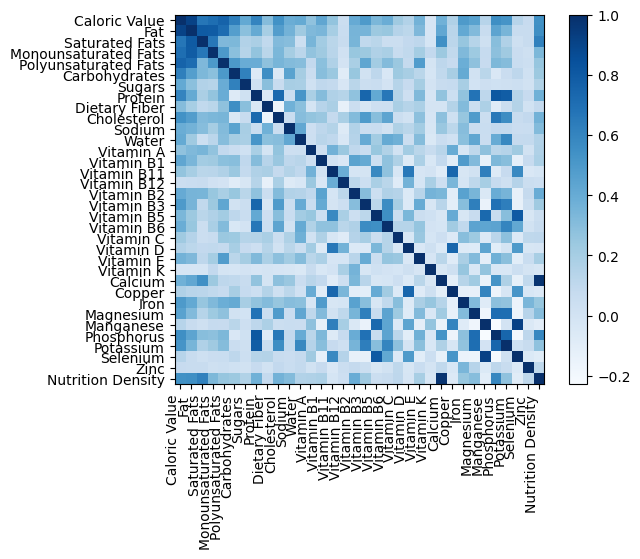

In [16]:
matrix = g1.corr()

# Creo una matriz de correlacion
plt.imshow(matrix, cmap='Blues')

# Le agrego la barra de colores
plt.colorbar()

# Obtengo las variables
variables = []
for i in matrix.columns:
    variables.append(i)

# Agrego las lables al grafico
plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
plt.yticks(range(len(matrix)), variables)

# Muestro el grafico
plt.show()

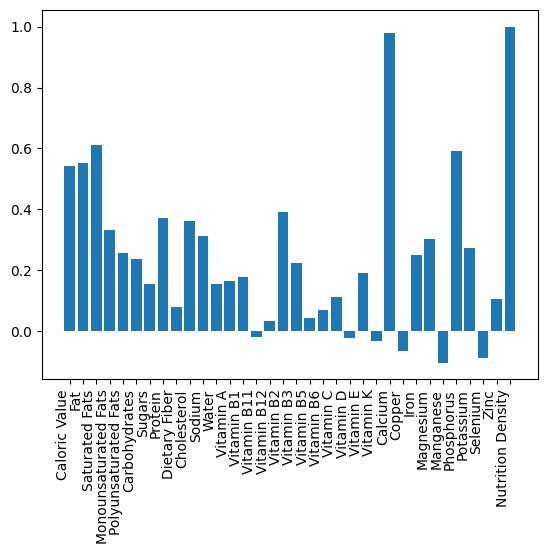

In [17]:
plt.bar(variables,matrix['Nutrition Density'])
# Agrego labels a la matriz
plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')

# plteo
plt.show()

In [18]:
matrix['Nutrition Density'][matrix['Nutrition Density'] < 0.2]

Sugars           0.156439
Dietary Fiber    0.079785
Water            0.153350
Vitamin A        0.164924
Vitamin B1       0.179269
Vitamin B11     -0.018458
Vitamin B12      0.033206
Vitamin B5       0.044695
Vitamin B6       0.068326
Vitamin C        0.111980
Vitamin D       -0.022136
Vitamin E        0.189900
Vitamin K       -0.032895
Copper          -0.063590
Manganese       -0.103193
Selenium        -0.086828
Zinc             0.105417
Name: Nutrition Density, dtype: float64

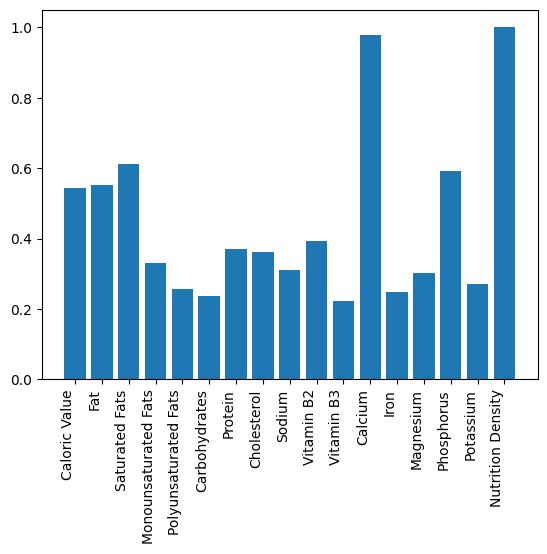

In [19]:
# extracting variable names
variables = []
for i in matrix['Nutrition Density'][matrix['Nutrition Density'] > 0.2].keys():
    variables.append(i)

plt.bar(variables,matrix['Nutrition Density'][matrix['Nutrition Density'] > 0.2])
# Adding labels to the matrix
plt.xticks(range(len(matrix['Nutrition Density'][matrix['Nutrition Density'] > 0.2])), variables, rotation=90, ha='right')

# Display the plot
plt.show()

In [20]:
g1['PP'] = g1['Potassium'] + g1['Phosphorus']
g1['Fats'] = g1['Caloric Value'] + g1['Fat'] + g1['Saturated Fats'] + \
            g1['Monounsaturated Fats'] + g1['Polyunsaturated Fats']
g1['PC'] = g1['Protein'] + g1['Cholesterol']

In [21]:
g1 = g1.drop(['Potassium', 'Phosphorus', 'Caloric Value', 'Fat', 'Saturated Fats',
             'Monounsaturated Fats', 'Polyunsaturated Fats', 'Sugars', 'Dietary Fiber',
             'Water', 'Vitamin A', 'Copper', 'Manganese', 'Selenium', 'Zinc',
             'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B5', 'Vitamin B6',
             'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Protein', 'Cholesterol'], axis=1)

In [22]:
g1 = g1[['PC', 'Carbohydrates', 'Sodium', 'Vitamin B2', 'Vitamin B3', 'Calcium',
        'Iron', 'Magnesium', 'Nutrition Density']]

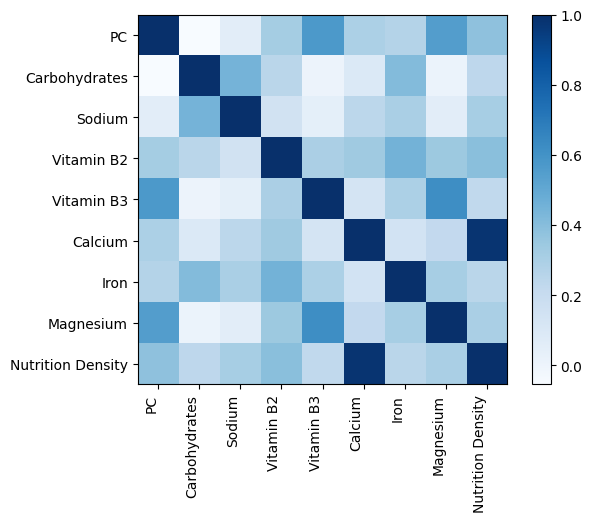

In [23]:
matrix = g1.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

In [24]:
Y = g1['Nutrition Density']
X = g1.drop(['Nutrition Density'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [27]:
print(model.coef_, model.intercept_)

[ 0.1743125   1.24005415  4.74829526 -4.77799499  1.24275426  1.01908289
  2.06048846  0.09196553] 1.8907566719885835


In [28]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))

0.9950413913274871


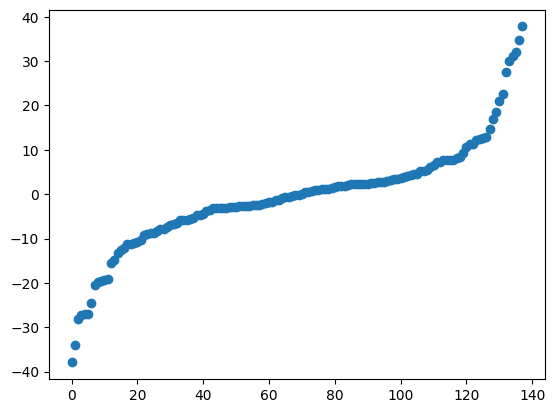

In [29]:
plt.scatter(range(len(y_test)), np.sort(y_test-y_pred))

(array([ 1.,  1.,  4.,  2.,  5.,  9., 16., 32., 36., 14.,  8.,  2.,  2.,
         2.,  3.,  1.]),
 array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,
         15.,  20.,  25.,  30.,  35.,  40.]),
 [<matplotlib.patches.Polygon at 0x24922caa0d0>])

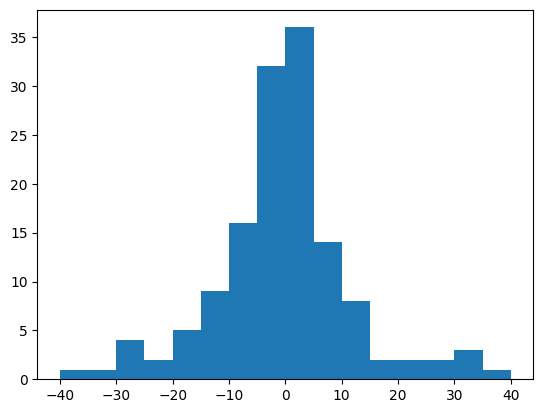

In [30]:
plt.hist((y_test-y_pred), bins=[-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], histtype='stepfilled')

# Levanto todo los CSV y los concateneo en uno solo

Dos maneras de levantar el data frame

un concat directo luego de haber levantado cada uno por separado

In [31]:
Full_df = pd.concat([g1, g2, g3, g4, g5], ignore_index=True)

In [32]:
num_rows_Full_df = Full_df.shape[0]
print(f"El numero de rows totales del data frame es: {num_rows_Full_df}")


El numero de rows totales del data frame es: 2395


In [33]:
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PC                    551 non-null    float64
 1   Carbohydrates         2395 non-null   float64
 2   Sodium                2395 non-null   float64
 3   Vitamin B2            2395 non-null   float64
 4   Vitamin B3            2395 non-null   float64
 5   Calcium               2395 non-null   float64
 6   Iron                  2395 non-null   float64
 7   Magnesium             2395 non-null   float64
 8   Nutrition Density     2395 non-null   float64
 9   Unnamed: 0.1          1844 non-null   float64
 10  Unnamed: 0            1844 non-null   float64
 11  food                  1844 non-null   object 
 12  Caloric Value         1844 non-null   float64
 13  Fat                   1844 non-null   float64
 14  Saturated Fats        1844 non-null   float64
 15  Monounsaturated Fats 

Si no levante los files individuales puedo levantar todo asi: 

In [56]:

# URL Base de donde obtener los files
root = "https://raw.githubusercontent.com/NatanCuello30/Data-Science-1/main/DataScience/FINAL_FOOD_DATASET"

groups = []

for i in range(1, 6):
    # Armo el nombre del archivo
    filename = f"FOOD-DATA-GROUP{i}.csv"
    encoded_filename = quote(filename)
    # Armo la URL para cada CSV
    fileurl = f"{root}/{encoded_filename}"
    # Leo los files
    df = pd.read_csv(fileurl)
    # Dropeo las columnas que no quiero.
    df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, errors='ignore')
    groups.append(df)

# CConcateneo todo usando un outerJoin
Test_df = pd.concat(groups, ignore_index=True, join='outer')

# Tiro un info para confirmar si tengo todos los datos. 
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [35]:
Test_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [36]:
# Verifico si tengo algun NaN
has_nans = Test_df.isna().any().any()

check = "Yes" if has_nans else "No"


# Printeo el resultado del analiss
print(f"Hay Algun 'Nan' en el DataFrame? {check}")

Hay Algun 'Nan' en el DataFrame? No


In [37]:
unics, counts = np.unique(Test_df["food"], return_counts=True)

unics, counts

(array(['abalone', 'abiyuch', 'acerola cherry', ..., 'zucchini cooked',
        'zucchini raw', 'zwieback'], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [38]:
def plot_nutrient(food: str, data: pd.DataFrame=Test_df):
    # Filtrar o dataframe para o alimento especificado
    if food not in Test_df['food'].values:
        print(f"O alimento '{food}' não foi encontrado.")
        return

    # Ffiltro la linea del alimento especifico
    nutrient_data = Test_df[data['food'] == food].iloc[0]

    # Elimino la columna con el nombre del alimento para enfocarme en los nutrientes
    nutrients = nutrient_data.drop(labels=['food'])

    nutrients_df = nutrients.reset_index()
    nutrients_df.columns = ['Nutrient', 'Quantity']

    # plteo con seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Nutrient', y='Quantity', hue='Nutrient', data=nutrients_df, palette='pastel', dodge=False)

    plt.legend([],[], frameon=False)

    # agrego titulo y labels
    plt.title(f"Nutrientes de {food}")
    plt.xlabel("Nutrientes")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=75)

    # Ploteo
    plt.show()
    

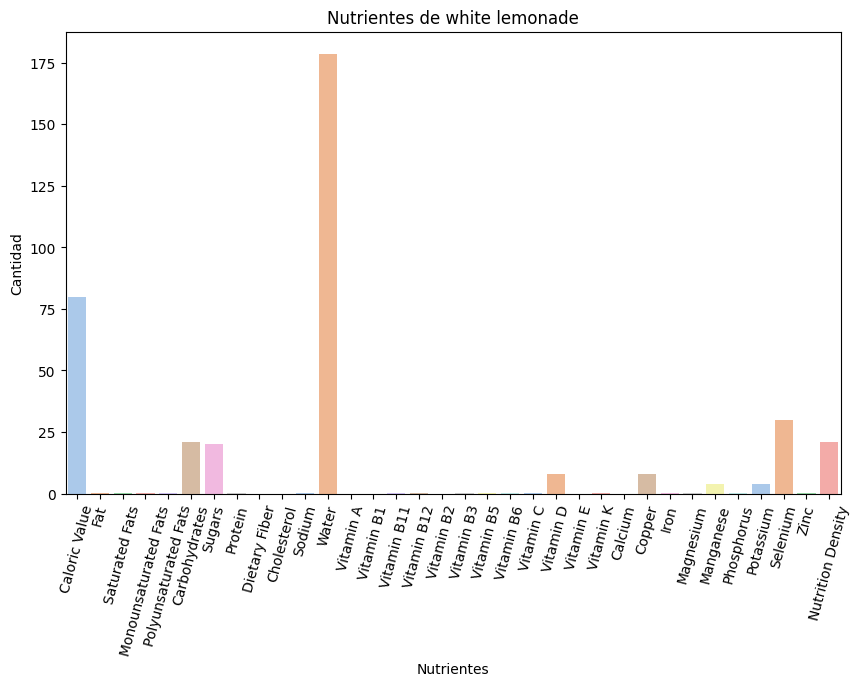

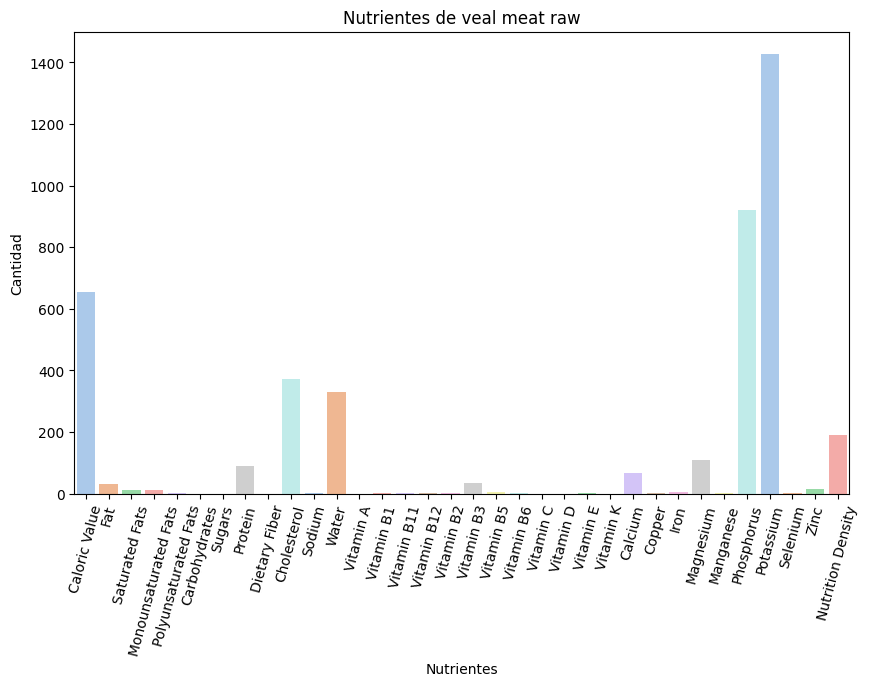

In [39]:
for _ in range(2):
    random_food = Test_df.iloc[np.random.randint(len(Test_df))]['food']
    plot_nutrient(random_food)
    print()

In [40]:
# Algunas estadísticas
var_target = df['Nutrition Density']
var_target.describe().round(0)

count    722.0
mean      75.0
std      113.0
min        0.0
25%       14.0
50%       35.0
75%       83.0
max      919.0
Name: Nutrition Density, dtype: float64

Text(0.5, 1.0, 'Distribución de Densidad Nutricional')

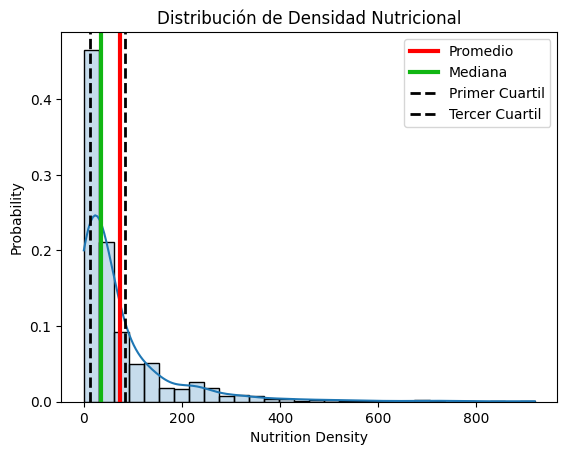

In [41]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = var_target.mean()
mediana = var_target.median()
primer_cuartil = var_target.quantile(0.25)
tercer_cuartil = var_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Nutrition Density',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Densidad Nutricional')

In [42]:
# Metodo 2: Z-Score 
media = var_target.mean()
desvio = var_target.std()
valores_z = (var_target - media)/desvio

# Limites: 
limite_inf = (-3)
limite_sup = 3

print(valores_z)

0     -0.545087
1     -0.416506
2     -0.539520
3      1.269410
4     -0.503236
         ...   
717   -0.445277
718   -0.656048
719   -0.644596
720   -0.576690
721   -0.643914
Name: Nutrition Density, Length: 722, dtype: float64


Identifico los outliers con método ZScore

In [43]:
# Identifico outliers: 
df['Otlier_ZScore'] = np.where((valores_z < limite_inf) | (valores_z > limite_sup),1,0)
df['Otlier_ZScore'].value_counts()

Otlier_ZScore
0    704
1     18
Name: count, dtype: int64

([], [])

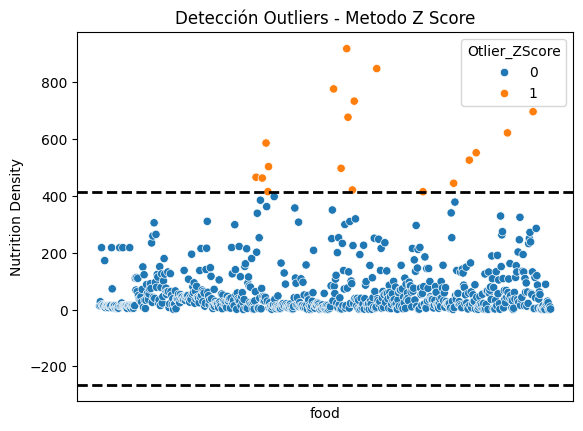

In [44]:
limite_inf_tr = limite_inf * desvio + media
limite_sup_tr = limite_sup * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'food',
                y = 'Nutrition Density',
               hue = 'Otlier_ZScore')
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Z Score')

# Eliminar las etiquetas del eje X
plt.xticks([])

Grafico sin outliers

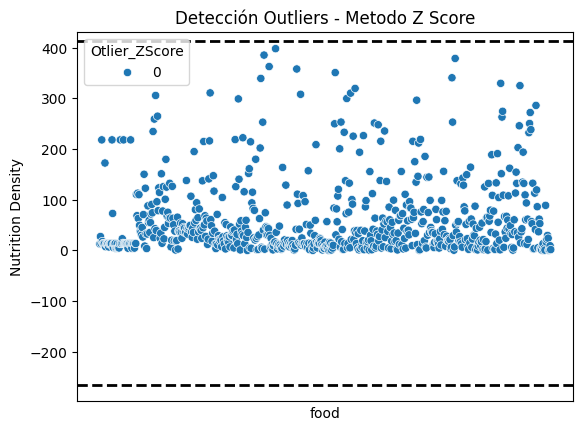

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'limite_inf_tr', 'limite_sup_tr', 'df', 'desvio', y 'media' ya están definidos

# Filtrar el DataFrame para excluir outliers
df_filtrado = df[(df['Nutrition Density'] >= limite_inf_tr) & (df['Nutrition Density'] <= limite_sup_tr)]

# Graficar solo los datos filtrados
plt.figure()
sns.scatterplot(data = df_filtrado,
                x = 'food',
                y = 'Nutrition Density',
                hue = 'Otlier_ZScore')  # Asegúrate de que 'Otlier_ZScore' es el nombre correcto de la columna
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Z Score')

# Eliminar las etiquetas del eje X
plt.xticks([])

# Mostrar el gráfico
plt.show()

Acomodo el eje Y para hacer zoom a los datos

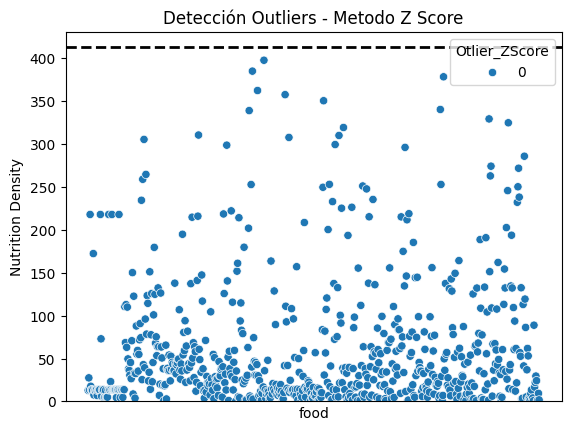

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

limite_inf_tr = limite_inf * desvio + media
limite_sup_tr = limite_sup * desvio + media


# Suponiendo que 'limite_inf_tr', 'limite_sup_tr', 'df', 'desvio', y 'media' ya están definidos

# Filtrar el DataFrame para excluir outliers
df_filtrado = df[(df['Nutrition Density'] >= limite_inf_tr) & (df['Nutrition Density'] <= limite_sup_tr)]

# Grafico 
plt.figure()
ax = sns.scatterplot(data = df_filtrado,
                     x = 'food',
                     y = 'Nutrition Density',
                     hue = 'Otlier_ZScore')  # Asegúrate de que 'Otlier_ZScore' es el nombre correcto de la columna
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Z Score')

# Establecer el límite inferior del eje Y a 0
ax.set_ylim(bottom=0)

# Eliminar las etiquetas del eje X
plt.xticks([])

# Mostrar el gráfico
plt.show()

# Analisis de nutrientes

In [47]:
def search_foods(name_nutrient: str, Test_df: pd.DataFrame = Test_df, ascending: bool = False, n: int = 10):
    # Verificar se o nutriente especificado existe no dataframe
    if name_nutrient not in Test_df.columns:
        print(f"Nutriente '{name_nutrient}' No encontrado en el conjunto de datos.")
        return

    # Ordenar os alimentos com base no nutriente especificado
    foods = Test_df.sort_values(by=name_nutrient, ascending=ascending)[['food', name_nutrient]].head(n)

    # Exibir mensagem indicando a ordem
    order = "Menores" if ascending else "Mayores"
    print(f"Los {n} alimentos con los {order} valores de {name_nutrient}:")

    print(foods)

In [48]:
# Example 1
search_foods('Sugars')

Los 10 alimentos con los Mayores valores de Sugars:
                           food  Sugars
622            vanilla frosting   291.5
1466      danone low fat alsafi   255.0
707            banana cream pie   143.0
1968  cranberry sauce sweetened   105.0
2345        sweet potato canned    98.3
980              golden raisins    97.7
982        zante currants dried    96.9
746         chocolate semisweet    91.6
619         saccharin sweetener    85.2
632                almond paste    82.3


In [49]:
# Example 2
search_foods('Vitamin A')

Los 10 alimentos con los Mayores valores de Vitamin A:
                           food  Vitamin A
594            dessert wine dry      362.7
1091      hyacinth beans cooked      134.1
575   muller thurgau white wine      129.2
570              gamay red wine      128.6
593         semillon white wine      128.1
602       fume blanc white wine      127.9
586          lemberger red wine      127.9
600             claret red wine      127.0
580       petite sirah red wine      126.7
576           mouvedre red wine      126.1


In [50]:
# Example 3
search_foods('Caloric Value')

Los 10 alimentos con los Mayores valores de Caloric Value:
                          food  Caloric Value
1437            goose meat raw           6077
1374       pork arm picnic raw           5298
1376    pork arm picnic cooked           5292
1430             duck meat raw           5123
1372              pork backfat           3683
1339  pork top loin roasts raw           3644
1403        pork spareribs raw           3593
1406         turkey breast raw           3554
999      coconut whole coconut           3336
1438     turkey breast roasted           3266


El coeficiente de correlación entre 'Nutrition Density' y 'Caloric Value' es: 0.5353225448947773


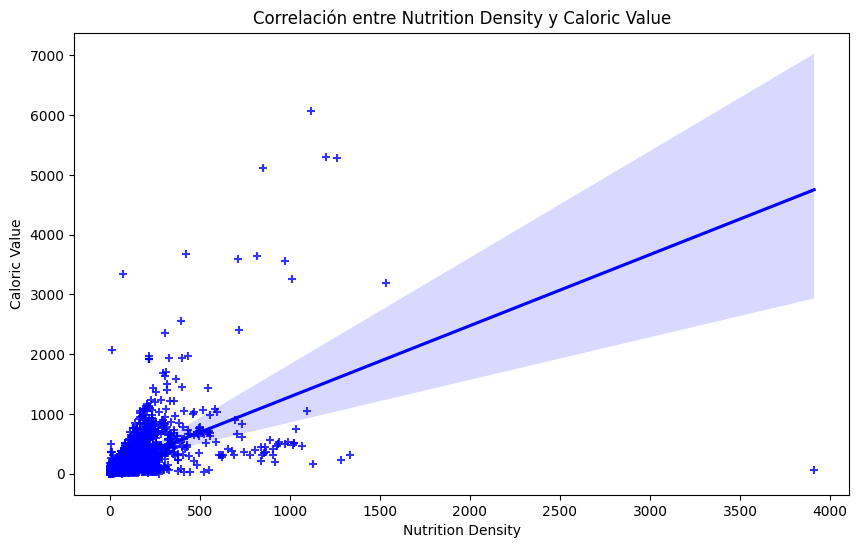

In [51]:

# Suponiendo que Test_df es tu DataFrame y ya está cargado

# Calcular el coeficiente de correlación
correlation = Test_df['Nutrition Density'].corr(Test_df['Caloric Value'])
print(f"El coeficiente de correlación entre 'Nutrition Density' y 'Caloric Value' es: {correlation}")

# Graficar la relación entre 'Nutrition Density' y 'Caloric Value'
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño del gráfico según tus necesidades
sns.regplot(x='Nutrition Density', y='Caloric Value', data=Test_df, color='blue', marker='+')

# Añadir título y etiquetas a los ejes
plt.title('Correlación entre Nutrition Density y Caloric Value')
plt.xlabel('Nutrition Density')
plt.ylabel('Caloric Value')

# Mostrar el gráfico
plt.show()

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text 
import nltk

# Descargar la lista de palabras vacías en portugués de nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Suponiendo que Test_df es tu DataFrame y ya está cargado

# Combinar las listas de palabras vacías en inglés y portugués en una lista
english_stop_words = list(text.ENGLISH_STOP_WORDS)
portuguese_stop_words = stopwords.words('portuguese')
combined_stop_words = english_stop_words + portuguese_stop_words

# Vectorizar la columna 'Food' utilizando TF-IDF con palabras vacías en inglés y portugués
vectorizer = TfidfVectorizer(stop_words=combined_stop_words)
X = vectorizer.fit_transform(Test_df['food'])

# Elegir un número de clusters para K-Means
# Este número debería ser elegido basado en el conocimiento del dominio o métodos como el método del codo
num_clusters = 10  # Ejemplo: 5 categorías de alimentos

# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a cada elemento en 'Food'
Test_df['Cluster'] = kmeans.labels_

# Asignar una categoría provisional a cada cluster
# Esto es solo un ejemplo, necesitarás revisar los clusters y asignar las categorías apropiadas
for cluster_num in range(num_clusters):
    Test_df.loc[Test_df['Cluster'] == cluster_num, 'Category'] = f'Category_{cluster_num}'

# Seleccionar y mostrar solo las columnas 'food' y 'Category'
print(Test_df[['food', 'Category']])
# O si estás en Jupyter Notebook, puedes usar:
# display(Test_df[['food', 'Category']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                  food    Category
0                         cream cheese  Category_2
1                    neufchatel cheese  Category_2
2     requeijao cremoso light catupiry  Category_1
3                       ricotta cheese  Category_2
4                 cream cheese low fat  Category_2
...                                ...         ...
2390                          jews ear  Category_1
2391                   enoki mushrooms  Category_1
2392                   morel mushrooms  Category_1
2393          portabella mushrooms raw  Category_3
2394                   oyster mushroom  Category_1

[2395 rows x 2 columns]


In [57]:

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

# Suponiendo que Test_df es tu DataFrame y ya está cargado

# Combinar las listas de palabras vacías en inglés y portugués en una lista
english_stop_words = list(text.ENGLISH_STOP_WORDS)
portuguese_stop_words = stopwords.words('portuguese')
combined_stop_words = english_stop_words + portuguese_stop_words

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Definir la función de lematización
def lemmatize_text(text):
    # Comprobar si el texto es nulo o no es una cadena
    if pd.isnull(text) or not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return ' '.join(lemmatized)

# Suponiendo que Test_df es tu DataFrame y ya está cargado
# Aplicar la lematización a la columna 'food'
Test_df['food_processed'] = Test_df['food'].apply(lemmatize_text)

# Vectorizar la columna 'food_processed' utilizando TF-IDF con palabras vacías en inglés y portugués
vectorizer = TfidfVectorizer(stop_words=combined_stop_words)
X = vectorizer.fit_transform(Test_df['food_processed'])

# Elegir un número de clusters para K-Means
# Este número debería ser elegido basado en el conocimiento del dominio o métodos como el método del codo
num_clusters = 10  # Ejemplo: 5 categorías de alimentos

# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a cada elemento en 'food_processed'
Test_df['Cluster'] = kmeans.labels_

# Asignar una categoría provisional a cada cluster
# Esto es solo un ejemplo, necesitarás revisar los clusters y asignar las categorías apropiadas
for cluster_num in range(num_clusters):
    Test_df.loc[Test_df['Cluster'] == cluster_num, 'Category'] = f'Category_{cluster_num}'

# Seleccionar y mostrar solo las columnas 'food' y 'Category'
print(Test_df[['food', 'Category']])
# O si estás en Jupyter Notebook, puedes usar:
# display(Test_df[['food', 'Category']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\QY539GE/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\QY539GE\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
